# MNIST_digit_classification_with Neural_network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Libraries for Deep_learning neural networks

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
# Loading the mnist dataset from keras.datasets
# The dataset is already processed, we get:
# x_train, y_train, x_test, y_test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
type(x_train)

numpy.ndarray

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


 60000 are the no.of_images   
 (28,28) are the dimensions of the images   
 these are grayscale images

In [6]:
print(x_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


5


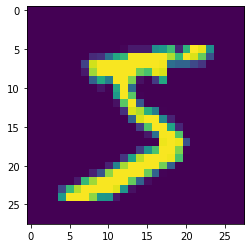

In [7]:
plt.imshow(x_train[0])
print(y_train[0])

In [8]:
# Image labels we have

print(y_train.shape, y_test.shape)

print(np.unique(y_train))

(60000,) (10000,)
[0 1 2 3 4 5 6 7 8 9]


We have 0 to 9 numbers in y_train

All the images are in the same dimension,    
          if not then we need to resize the images to a common dimension.

In [9]:
# scaling the values

x_train = x_train/255
x_test = x_test/255

When we so this scaling the values in the x_train and x_test are decreased to certain number,    
this helps in faster processing and easy to compute

In [10]:
# Building the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),     # relu = rectified linear unit activation function
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
# compiling the Neural Network

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
# trainnig the Neural Model

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 5ms/step - loss: 0.3001 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1342 - accuracy: 0.9600
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0988 - accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0804 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0584 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0499 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0397 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.03

Training data accuracy = 98.9%

In [13]:
# Accuracy on the test data

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 5s 5ms/step - loss: 0.0911 - accuracy: 0.9751
0.9750999808311462


Test data accuracy = 97.2%

In [14]:
print(x_test.shape)

(10000, 28, 28)


0


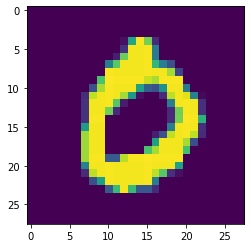

In [15]:
plt.imshow(x_test[3])
print(y_test[3])

In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
print(y_pred[1])

[2.2235874e-05 9.8635209e-01 9.9999982e-01 4.6433066e-03 1.7645797e-16
 6.2099059e-07 1.8522598e-05 1.1510921e-05 1.8164139e-04 2.2713525e-07]


In [18]:
print(y_pred.shape)

(10000, 10)


10000 are the no_of images    
and     
10 is the probabilties of 10 outcomes

In [19]:
# We use "np.argmax()" function that helps to get the max value in an numpy array
# Converting the prediction probabilty to class labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [20]:
# Confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 963    1    0    1    0    5    6    1    3    0]
 [   1 1128    2    0    0    1    2    0    1    0]
 [   1    5  999    5    5    2    3    7    5    0]
 [   1    0    4  987    0    7    0    2    4    5]
 [   0    1    2    1  961    0    6    2    3    6]
 [   2    0    0    6    2  876    3    1    0    2]
 [   0    3    0    1    4    7  940    0    3    0]
 [   2    6   10    0    1    1    0 1001    2    5]
 [   6    1    2    9    6   14    1    4  927    4]
 [   2    3    1    3   15    8    1    4    3  969]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

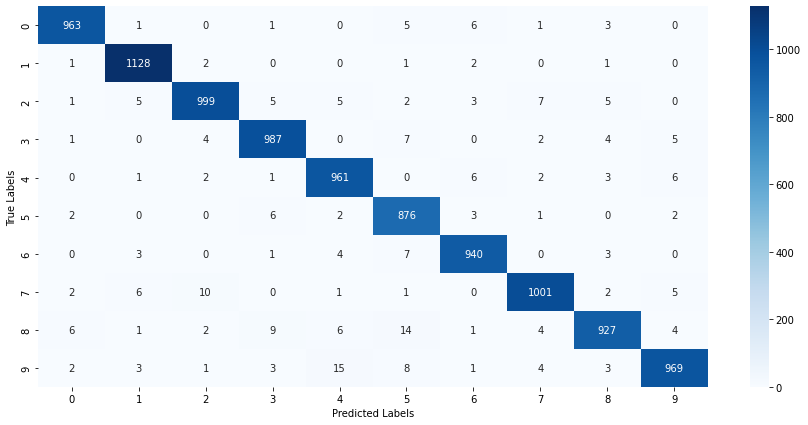

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Building the Predictive system

1/1 [==============================] - 0s 63ms/step
7


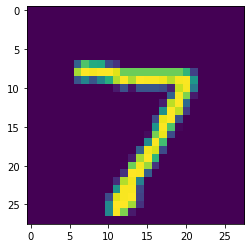

In [22]:
input_image_path = 'c://users/santhosh reddy/desktop/untitled folder/mnist.png'

input_image = cv2.imread(input_image_path)

input_gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(input_gray, (28,28))
plt.imshow(input_image_resized)

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)
print(input_pred_label)